**INTRODUÇÃO**

>O objetivo é analisar como as músicas dos **Rolling Stones** impactam os usuários do **Spotify**, identificando padrões de consumo e preferências para aprimorar recomendações e estratégias da plataforma.

**Importando as bibliotecas**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

**Carregando o arquivo**

In [3]:
df = pd.read_excel('dataset_rolling_stones.xlsx')

 **ANÁLISE EXPLORATÓRIA**

In [4]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [5]:
#Exibindo os tipos de dados das colunas
print(df.dtypes)

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object


In [6]:
#Quantidades de linhas e colunas do dataset
df.shape

(1610, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [8]:
#Inicio e o fim do ano de lançamento dos álbuns
print("Data Inicial: ", df['release_date'].min())
print("Data Final: ", df['release_date'].max())

Data Inicial:  1964-04-16 00:00:00
Data Final:  2022-06-10 00:00:00


In [9]:
# Contando valores nulos em cada coluna
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [10]:
# Contando registros duplicados
df.duplicated().sum()

np.int64(6)

In [11]:
# Exibindo registros duplicados
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


Os duplicados correspondem aos álbuns, mas as músicas são diferentes.

In [12]:
#Análise descritiva: média, valor mínimo e máximo, desvio padrão e quartis
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [13]:
#Criando uma coluna duration_ms em minutos
df['duracao_em_min'] = df['duration_ms'] / 60000
df.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [14]:
#Agrupando os álbuns para calcular a média do tempo
df.groupby('album')['duracao_em_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

**ANÁLISE GRÁFICA**

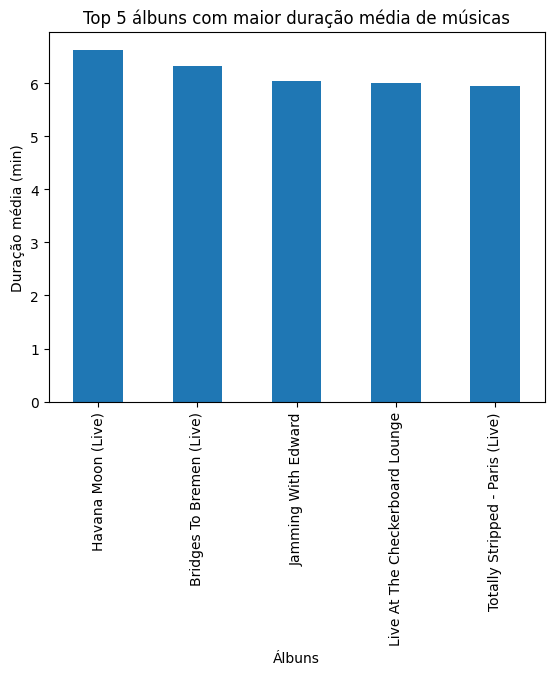

album
Havana Moon (Live)                 6.632819
Bridges To Bremen (Live)           6.332265
Jamming With Edward                6.042794
Live At The Checkerboard Lounge    6.009647
Totally Stripped - Paris (Live)    5.947430
Name: duracao_em_min, dtype: float64

In [15]:
# Ordenando os álbuns pela média de tempo das músicas, do maior para o menor
df_maior_duracao_musica = df.groupby('album')['duracao_em_min'].mean().sort_values(ascending=False)

#Top 5
df_maior_duracao_musica.head(5).plot(kind='bar') #Escolhendo o Tipo de gráfico
plt.xlabel('Álbuns') #Título - eixo horizontal
plt.ylabel('Duração média (min)')#Título - eixo vertical
plt.title('Top 5 álbuns com maior duração média de músicas') #Título do gráfico
plt.show() #Mostrando o gráfico

display(df_maior_duracao_musica.head(5))

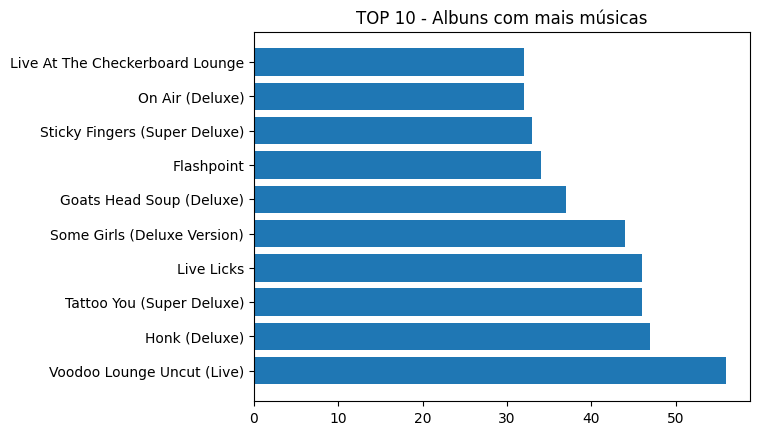

In [16]:
#Top 10
top_albums = df['album'].value_counts().head(10)
#Separando os nossos valores no eixo X e Y
plt.barh(top_albums.index, top_albums.values)
plt.title("TOP 10 - Albuns com mais músicas")
plt.show()

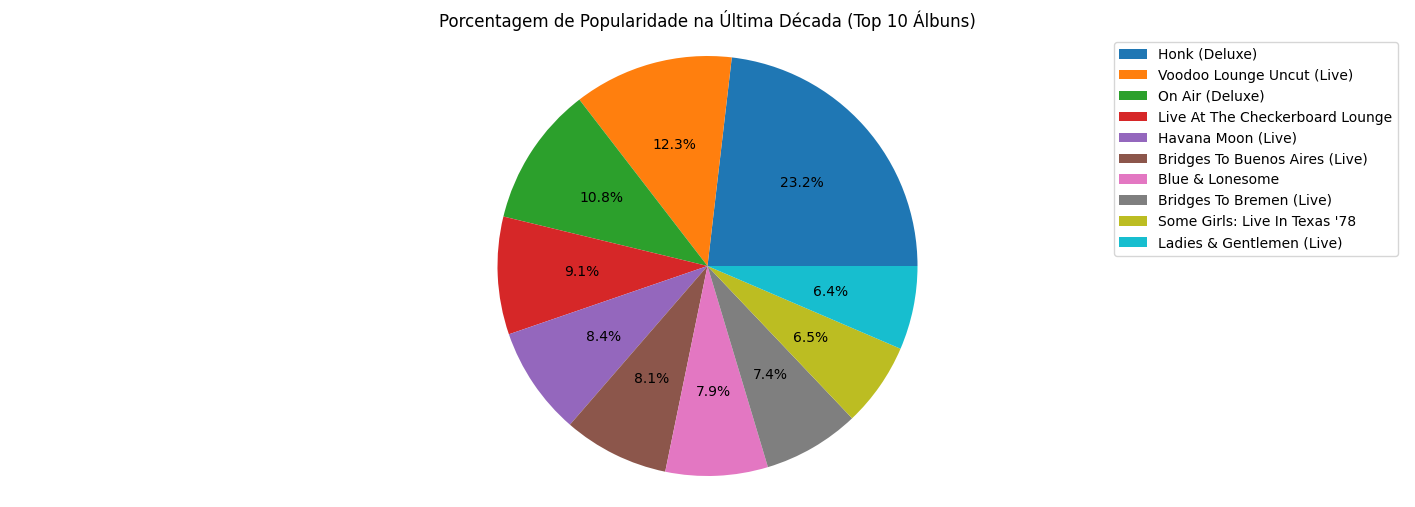

In [17]:
#Top 10 álbuns populares da última década
#Filtrando dados da última década
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

#Agrupando os dados por álbum e somar a coluna "popularity"
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

#CCalculando a porcentagem de popularidade para cada álbum
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100

#Separando os valores e nomes em uma lista
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

#Gráfico de pizza
figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct='%1.1f%%') #Formatando valores em porcentagem com 2 casas decimais
grafico.axis('equal') #Ajusta a escala dos eixos para serem proporcionais
plt.title('Porcentagem de Popularidade na Última Década (Top 10 Álbuns)')
plt.legend(labels, loc='best') #Legenda
plt.show()

**OUTLIERS**

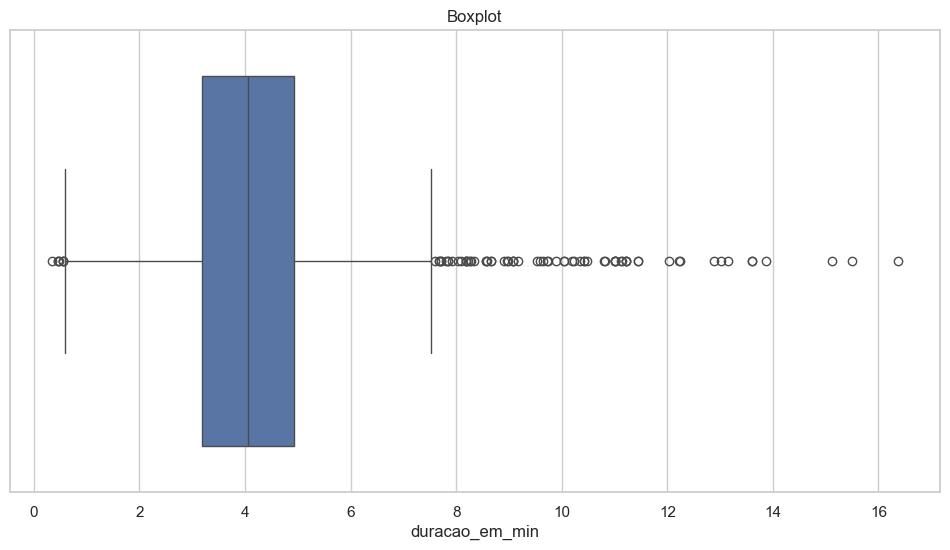

In [18]:

#Gráfico boxplot
sns.set(style="whitegrid") #cor/estilo do gráfico
fig, axes = plt.subplots(figsize=(12,6)) #Configurando tamanho
sns.boxplot(x="duracao_em_min", data=df) #Criando um gráfico boxplot
axes.set_title('Boxplot') #Titulo
plt.show() #Exibindo
     

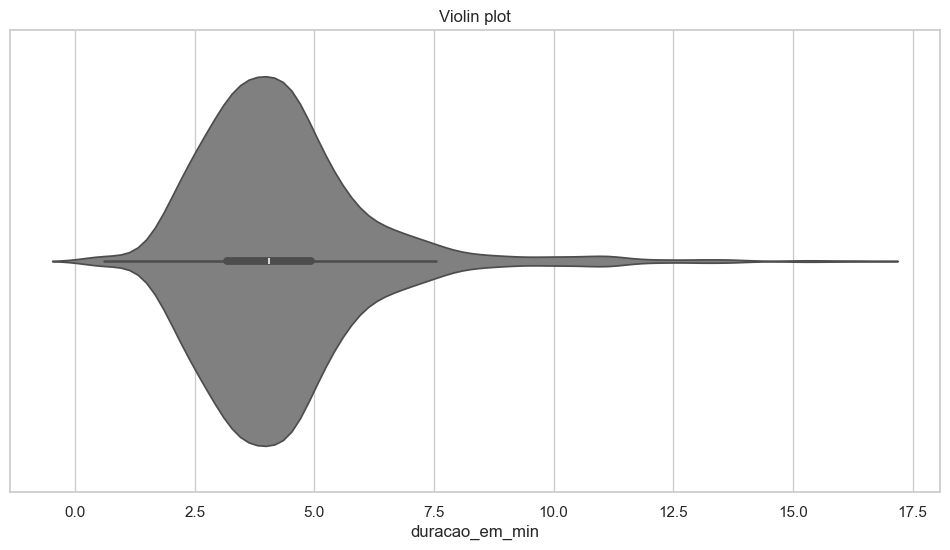

In [19]:

#Gráfico de violino
fig, axes = plt.subplots(figsize=(12,6)) #Criando o subplot do boxplot
sns.violinplot(x="duracao_em_min", data=df, color="gray") #Criando um gráfico
axes.set_title('Violin plot') #Titulo
plt.show() #Exibindo

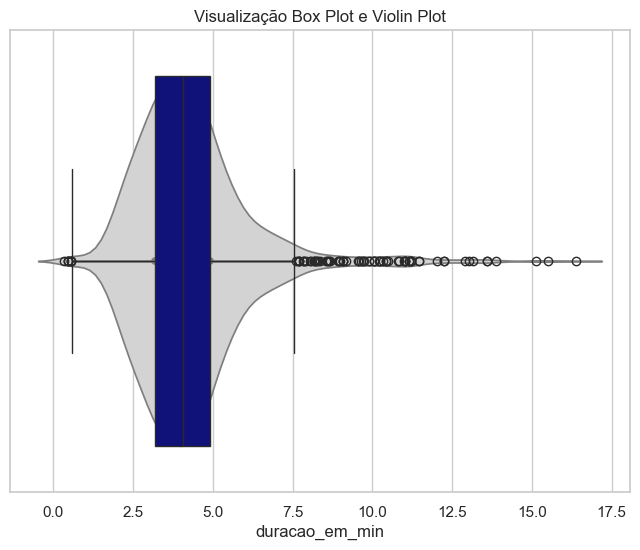

In [20]:
# Gráficos mesclados
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='duracao_em_min', data=df, ax=ax, color='lightgray') #Configurando o violin plot primeiramente
sns.boxplot(x='duracao_em_min', data=df, ax=ax, whis=1.5, color='darkblue') #Por baixo - boxplot
ax.set_title('Visualização Box Plot e Violin Plot')
plt.show() #Exibindo

In [21]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


Músicas ao vivo contêm a palavra "Live" em algum ponto de seu nome.









In [22]:
# Verificando se a música é ao vivo
def classifica_musica_ao_vivo(df):
    if df['liveness'] >= 0.8:
        return True
    else:
        return False

# Criando uma nova coluna com a classificação
df['ao_vivo'] = df.apply(classifica_musica_ao_vivo, axis=1)

In [23]:
#Contagem
df.groupby('ao_vivo')['ao_vivo'].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [24]:
#Separado datafame em studio e show ao vivo
df_gravado_em_studio = df[df['ao_vivo'] == False]
df_show_ao_vivo = df[df['ao_vivo'] == True]

In [25]:
print("Média das músicas ao vivo é: ", df_show_ao_vivo['duracao_em_min'].mean())
print("Média gravadas em studio é: ", df_gravado_em_studio['duracao_em_min'].mean())

Média das músicas ao vivo é:  5.088648962516734
Média gravadas em studio é:  3.940451363908873


**HISTOGRAMAS E TESTE DE NORMALIDADE**

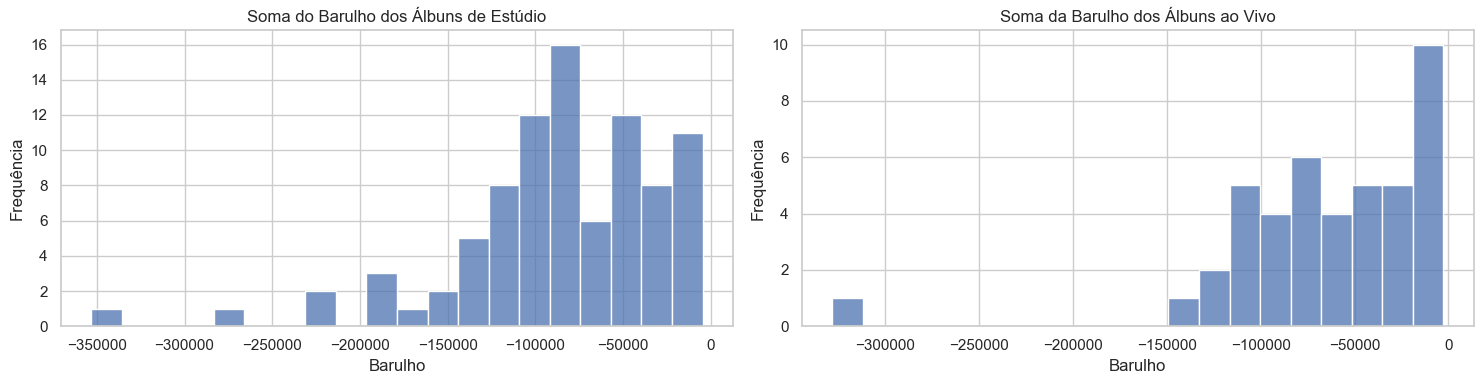

In [26]:
#Barulho das músicas nos albuns ao vivo VS os gravados em studio
df_studio = df_gravado_em_studio.groupby('album')['loudness'].sum()
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum()

#Configurando para criar dois gráficos um do lado do outro
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Primeiro gráfico
sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title('Soma do Barulho dos Álbuns de Estúdio')
axes[0].set_xlabel('Barulho')
axes[0].set_ylabel('Frequência')

#Segundo gráfico
sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title('Soma da Barulho dos Álbuns ao Vivo')
axes[1].set_xlabel('Barulho')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos
fig.tight_layout()
plt.show()

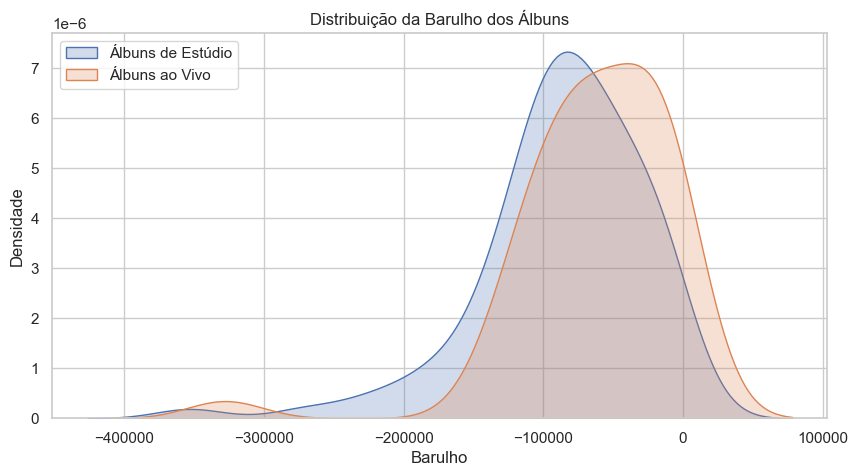

In [27]:
#Gráfico de densidade
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_studio, label='Álbuns de Estúdio', fill=True)
sns.kdeplot(data=df_ao_vivo, label='Álbuns ao Vivo', fill=True)
plt.title('Distribuição da Barulho dos Álbuns')
plt.xlabel('Barulho')
plt.ylabel('Densidade')
plt.legend()
plt.show()

**Teste de Hipótese**
>Os testes de hipóteses envolvem a formulação de uma hipótese nula (H0) e uma alternativa (H1) para comparar informações. Neste caso, analisamos se álbuns de estúdio possuem menos ruído que os ao vivo. A escolha do teste depende da distribuição dos dados, podendo exigir normalização se não forem normalmente distribuídos.

**Teste de Shapiro-Wilk**
>O teste de Shapiro-Wilk verifica se uma amostra segue uma distribuição normal. Se o valor-p for menor que 0,05, rejeita-se a hipótese nula, indicando que a amostra não é normal.

In [28]:
#Estudio
stat, p = shapiro(df_studio)
print('Soma do Barulho dos Álbuns de Estúdio:')
print('Estatística de Teste: {:.4f}, valor p: {}'.format(stat, p))
if p > 0.05:
    print('Não há evidência suficiente para rejeitar a hipótese de normalidade.')
else:
    print('A hipótese de normalidade é rejeitada.')
     

Soma do Barulho dos Álbuns de Estúdio:
Estatística de Teste: 0.8958, valor p: 3.2961810837730903e-06
A hipótese de normalidade é rejeitada.


In [29]:
#Show ao vivo
stat, p = shapiro(df_ao_vivo)
print('Soma do Barulho dos Álbuns ao Vivo:')
print('Estatística de Teste: {:.4f}, valor p: {}'.format(stat, p))
if p > 0.05:
    print('Não há evidência suficiente para rejeitar a hipótese de normalidade.')
else:
    print('A hipótese de normalidade é rejeitada.')

Soma do Barulho dos Álbuns ao Vivo:
Estatística de Teste: 0.7913, valor p: 2.35060091497093e-06
A hipótese de normalidade é rejeitada.


Os dados não seguem uma distribuição normal, portanto, não é possível aplicar testes de hipótese paramétricos.

**Teste não paramétrico Mann-Whitney U**

>O teste de Mann-Whitney U compara duas amostras para verificar se suas distribuições são diferentes, sem exigir normalidade. Ele ordena os valores, soma as classificações e calcula um valor U. Se esse valor for alto, indica diferença significativa entre as amostras.

In [30]:
#Realizando teste de mann withney U
#H0 afirma que não há diferença entre os álbuns de estúdio e ao vivo, enquanto H1 sugere que há uma diferença.

#Amostra aliatorias 
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)),  alternative='less')

#Imprimindo os resultados do teste
print('Estatística de teste U: ', stat)
print('Valor p: ', p)

#Verifica se a diferença nas médias é estatisticamente significante
alpha = 0.05
if p < alpha:
    print('Diferença estatisticamente significante')
else:
    print('Não há diferença estatisticamente significante')

Estatística de teste U:  1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significante


O p-valor menor que 0,05 confirma que os álbuns de estúdio são menos barulhentos que os ao vivo.

**MATRIZ DE CORRELAÇÃO DOS DADOS**

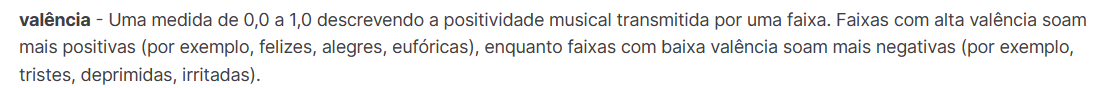

In [31]:
#Músicas são mais positiva ou negativa
media_por_album = df.groupby('album')['valence'].mean().reset_index()
#Renomeando a coluna 'valence' para 'media_valence'
media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})

In [32]:
#Regra: Álbuns com valência acima de 0,6 são classificados como músicas mais positivas
media_por_album['sentimento'] = ['positivo' if v > 0.6 else 'negativo' for v in media_por_album['media_valence']]
#Contagem
media_por_album.groupby('sentimento')['sentimento'].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [33]:
#Criando uma coluna de sentimento
df_resultado_final = pd.merge(df, media_por_album, on='album')
df_resultado_final

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True,0.271170,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True,0.271170,negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True,0.271170,negativo
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True,0.271170,negativo
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True,0.271170,negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False,0.745583,positivo
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False,0.745583,positivo
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False,0.745583,positivo
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False,0.745583,positivo


**Matriz de correlação**

>Quanto maior o número, maior será a associação matemática entre as variáveis.

In [34]:
#Média de cada album, se as músicas são mais positiva ou negativa
media_por_album = df.groupby('album')['valence'].mean().reset_index()
#Renomenado'valence' para 'media_valence'
media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})

In [35]:
# Filtra apenas as colunas numéricas do DataFrame
df_numerico = df_resultado_final.select_dtypes(include=['number'])

# Matriz de correlação com apenas as colunas numéricas
matriz_correlacao = df_numerico.corr()

# Seleciona apenas a linha e a coluna correspondentes à coluna "media_valence"
correlacao_sentimento = matriz_correlacao['media_valence']

# Analisando a correlação entre a média de valência dos álbuns (positiva ou negativa)
display(correlacao_sentimento)

track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_em_min     -0.309499
media_valence       1.000000
Name: media_valence, dtype: float64

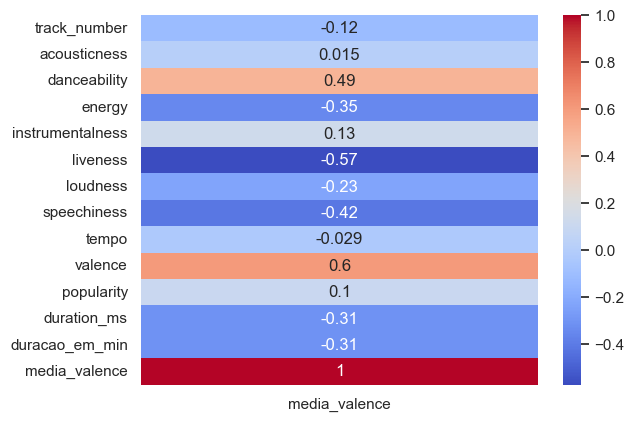

In [36]:
#Plota o heatmap
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm')
plt.show()

Uma forte correlação indica que as variáveis se movem juntas. "Valence" e "Danceability" estão relacionadas à "media_valence", mas como "Valence" já é incluída na média, devemos considerar apenas "Danceability".

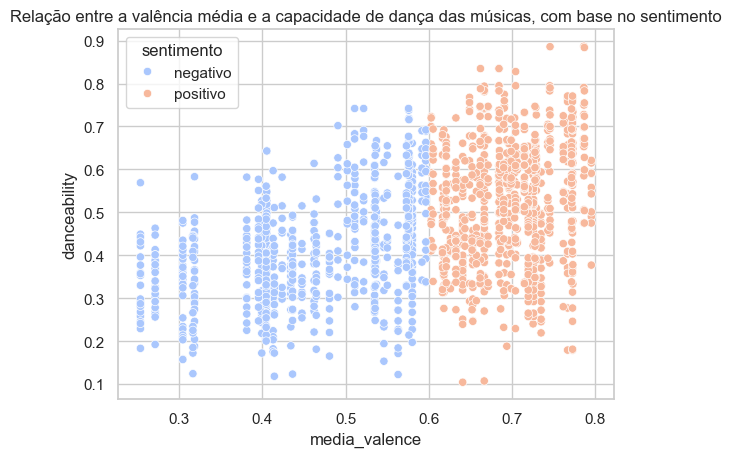

In [37]:
#Gráfico de dispersão
sns.scatterplot(x='media_valence', y='danceability', hue='sentimento', data=df_resultado_final, palette='coolwarm')
plt.xlabel('media_valence')
plt.ylabel('danceability')
plt.title('Relação entre a valência média e a capacidade de dança das músicas, com base no sentimento')
plt.show()
     

O gráfico mostra que, à medida que o sentimento da música aumenta (mais positivo/alegre/animado), sua dançabilidade também cresce.

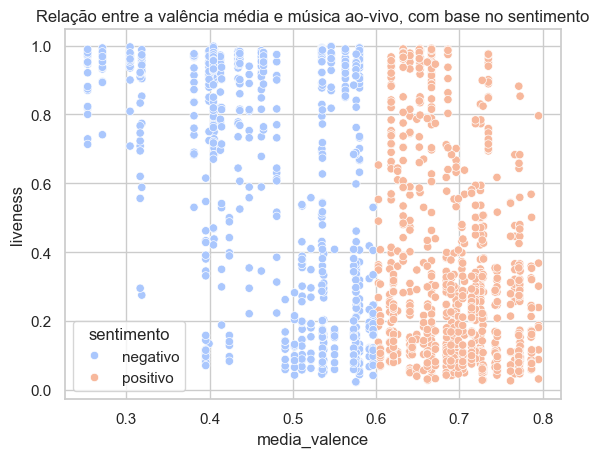

In [38]:
#Não estão correlacionadas
sns.scatterplot(x='media_valence', y='liveness', hue='sentimento', data=df_resultado_final, palette='coolwarm')
plt.xlabel('media_valence')
plt.ylabel('liveness')
plt.title('Relação entre a valência média e música ao-vivo, com base no sentimento')
plt.show()

O gráfico mostra que não há uma relação linear, indicando que as variáveis não são fortemente correlacionadas.